In [1]:
%cd D:\PYTHON\churn

D:\PYTHON\churn


# 1. Import bibliotek

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib import font_manager as fm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 2. Import bazy danych

In [3]:
df = pd.read_csv('train.csv')

# 3. Podstawowe sprawdzenie danych

In [4]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

# 4. Podział zbioru na testowy i treningowy

In [7]:
train,test = train_test_split(df,test_size=0.3,stratify=df['churn'])
print(f"Obserwacje w zbiorze treningowym: {len(train)}\nObserwacje w zbiorze testowym: {len(test)}\n")

Obserwacje w zbiorze treningowym: 2975
Obserwacje w zbiorze testowym: 1275



# 5. Analiza zmiennej celu

In [8]:
train['churn'].value_counts(normalize=True)

no     0.85916
yes    0.14084
Name: churn, dtype: float64

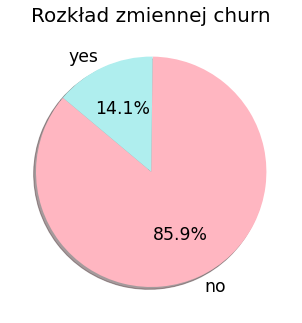

In [9]:
fig = plt.figure(1, figsize=(5,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.title('Rozkład zmiennej churn', fontsize=20)

patches, texts, autotexts = ax.pie(train['churn'].value_counts(), labels=['no', 'yes'], autopct='%1.1f%%',
                                  shadow=True, startangle=140, colors=['lightpink', 'paleturquoise'])

proptease = fm.FontProperties()
proptease.set_size('xx-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()

###### Z powyższego wykresu możemy wywnioskować, że przeważają osoby, które nie churnują.

# 6. Opisowa analiza danych

###### 6.1 Kolumny znakowe i zero-jedynkowe

In [10]:
train['state'].value_counts()

WV    93
ID    73
NJ    73
AL    72
VA    72
MN    71
NY    70
ME    69
CT    67
OH    67
UT    64
WI    64
KS    64
OR    63
NV    63
WY    63
TX    62
MI    61
KY    61
IL    61
MA    61
VT    61
MD    61
RI    60
NM    60
TN    59
DC    59
OK    58
MT    58
WA    57
MS    57
HI    57
NC    56
DE    54
SC    53
NE    53
NH    52
IN    52
SD    51
MO    51
FL    50
ND    50
AZ    50
CO    50
LA    49
AR    49
IA    46
PA    45
GA    41
AK    39
CA    23
Name: state, dtype: int64

In [11]:
train['area_code'].value_counts()

area_code_415    1482
area_code_408     759
area_code_510     734
Name: area_code, dtype: int64

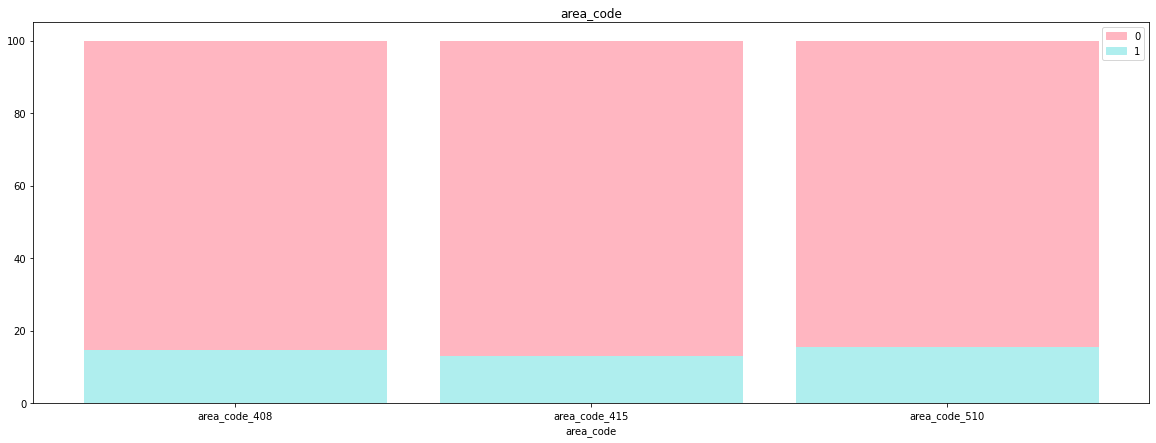

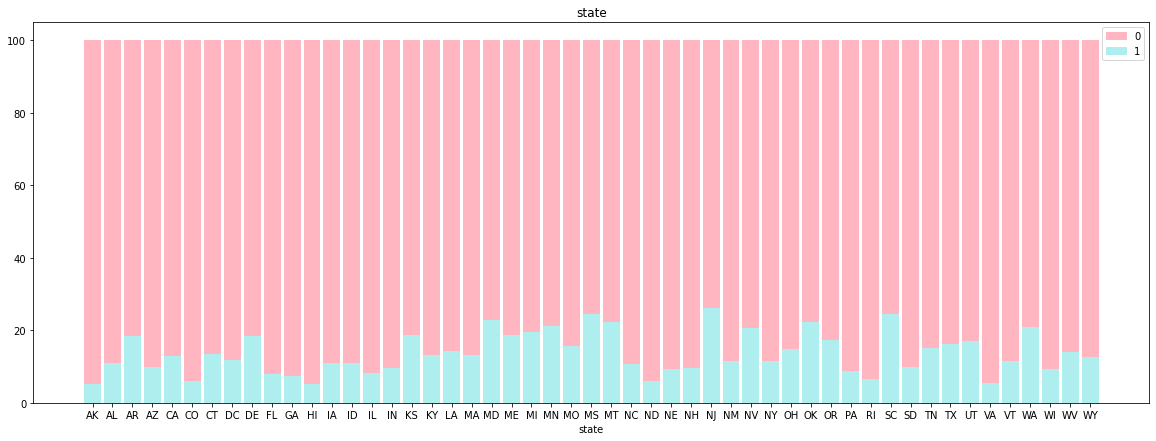

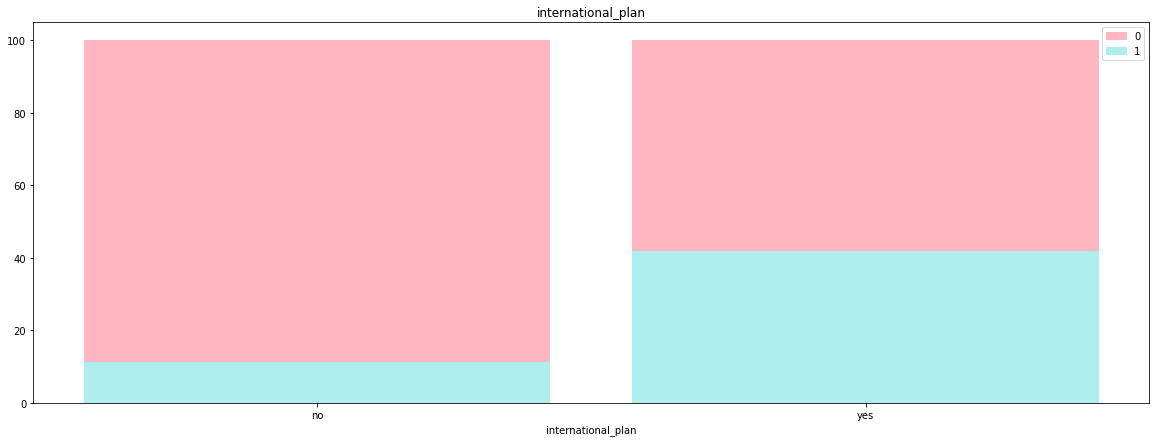

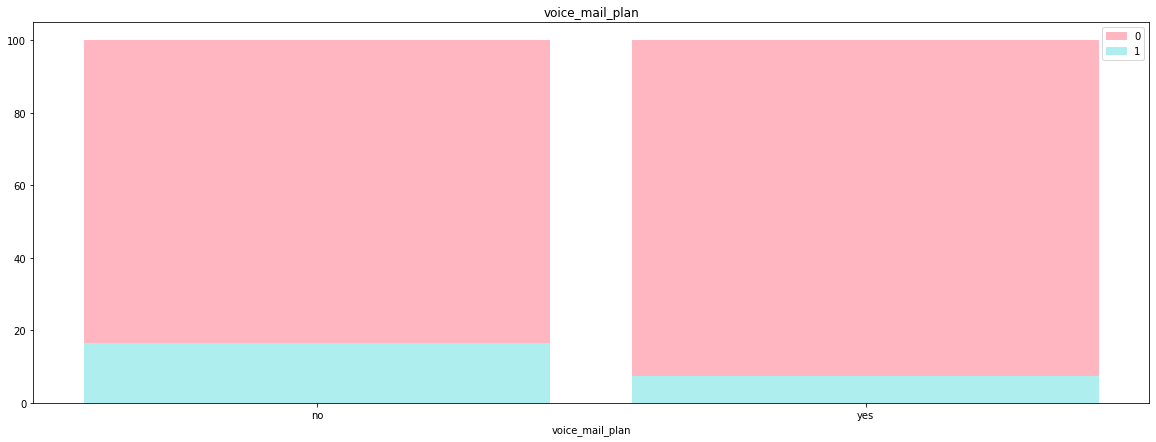

In [12]:
char_cols = ['area_code','state','international_plan','voice_mail_plan']
for i in char_cols:
    cross = pd.crosstab(train[i], train['churn'])
    totals = [i+j for i,j in zip(cross['no'], cross['yes'])]
    yes = [i/j * 100 for i,j in zip(cross['yes'],totals)]
    no = [i/j * 100 for i,j in zip(cross['no'], totals)]
    
    barWidth = 0.85
    r = cross.index
    plt.figure(figsize=(20,7))

    colors = {0:'lightpink', 1:'paleturquoise'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]


    plt.bar(r, yes, color='paleturquoise', width=barWidth)
    plt.bar(r, no, bottom=yes, color='lightpink', width=barWidth)
    plt.legend(handles, labels)
    plt.xticks(r)
    plt.xlabel(i)
    plt.title(i)
    plt.show()

###### Stan NJ i CA ma najwięcej osób, które churnują, a stan IL ma najmniej takich osób. Zmienna area_code na pierwszy rzut oka wygląda, jakby nie różnicowała zmiennej celu. Osoby posiadająca plan międzynarodowy w większości churnują.

###### 6.2 Kolumny numeryczne

In [13]:
num_cols = [i for i in train.columns if i not in char_cols and i!= 'churn']
num_cols

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [14]:
for i in num_cols:
    a_df = pd.DataFrame()
    a_df[i + '_yes'] = (train[train['churn'] == 'yes'][['churn', i]].describe())[i]
    a_df[i + '_no'] = (train[train['churn'] == 'no'][['churn',i]].describe())[i]
    print(i)
    print(a_df)
    print('')

account_length
       account_length_yes  account_length_no
count          419.000000        2556.000000
mean           102.114558         100.579421
std             38.590864          39.559734
min              3.000000           1.000000
25%             76.000000          73.000000
50%            102.000000         100.000000
75%            125.000000         127.000000
max            225.000000         243.000000

number_vmail_messages
       number_vmail_messages_yes  number_vmail_messages_no
count                 419.000000               2556.000000
mean                    4.436754                  8.102504
std                    11.349712                 13.618698
min                     0.000000                  0.000000
25%                     0.000000                  0.000000
50%                     0.000000                  0.000000
75%                     0.000000                 20.000000
max                    48.000000                 52.000000

total_day_minutes
       

###### Porównując zmienne w podziale na to, czy churnują, czy nie staram się szukać największych dysproporcji między średnią, a medianą. Spora dysproporcja jest w ilości rozmów serwisowych, jeżeli było ich mniej to klient ma mniejsze prawdopodobieństwo żeby zchurnować. Bardzo dużą dysproporcją średnich charakteryzuje się liczba maili - osoby churnujące średnio wysyłały 11 maili,a osoby nie churnujące 8.

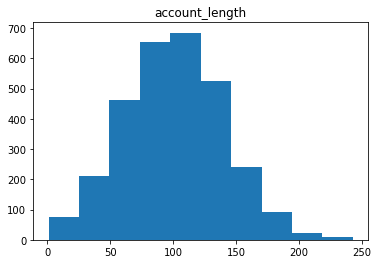

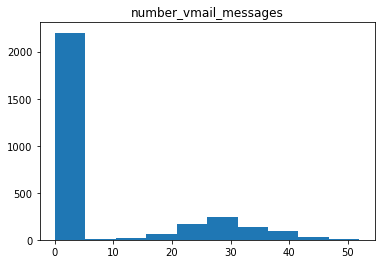

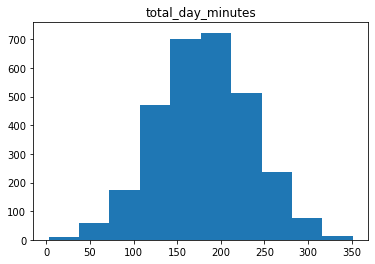

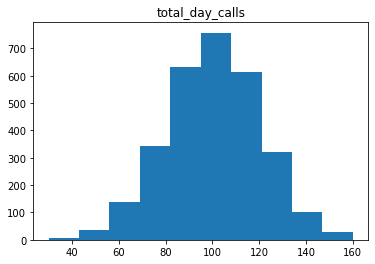

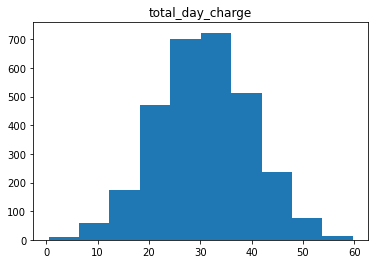

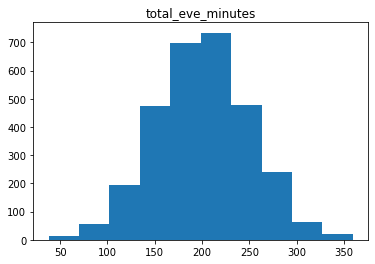

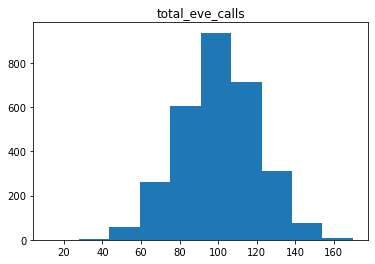

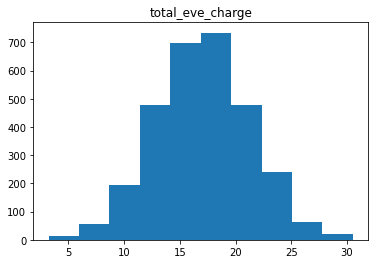

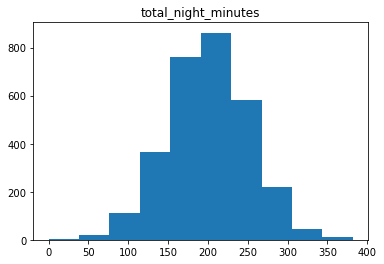

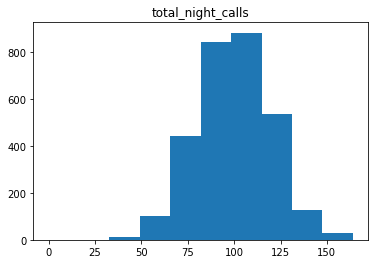

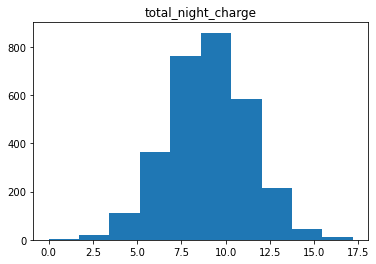

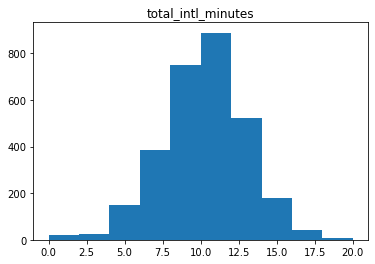

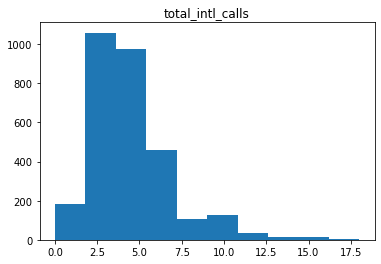

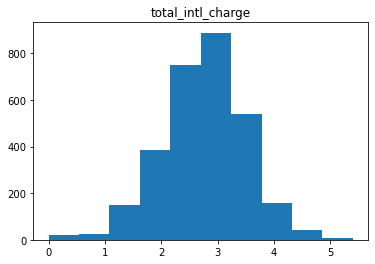

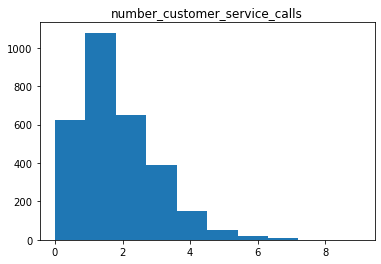

In [15]:
for i in num_cols:
    plt.hist(train[i])
    plt.title(i)
    plt.show()

###### Większość zmiennych charakteryzuje się rozkładem podobnym do normalnego.

# 7. Podstawowe przekształcenia danych

###### 7.1 Zmiana danych yes/no na 1/0

In [16]:
zmienneYesNo = ['international_plan','voice_mail_plan','churn']

for zmienne in zmienneYesNo:
    train[zmienne] = np.where(train[zmienne] == 'yes', 1, 0)
    test[zmienne] = np.where(test[zmienne] == 'yes', 1, 0)

D:\AnacondaReal\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\AnacondaReal\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3917,NY,57,area_code_510,0,1,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0
2709,SD,30,area_code_415,0,0,0,247.4,107,42.06,175.9,76,14.95,287.4,90,12.93,11.3,2,3.05,0,0
1742,VT,101,area_code_415,0,0,0,136.2,92,23.15,220.9,110,18.78,196.9,116,8.86,13.3,7,3.59,3,0
1009,IL,78,area_code_415,1,0,0,236.8,141,40.26,265.3,101,22.55,152.4,77,6.86,9.5,2,2.57,1,1
1338,CT,89,area_code_415,0,0,0,82.3,77,13.99,167.2,80,14.21,194.7,70,8.76,7.2,4,1.94,1,0


###### 7.2 Dumifikacja kolumn znakowych - przekształcenie ich do kolumn 0/1

In [18]:
to_dummify=['state','area_code']

for i in to_dummify:
    dummy = pd.get_dummies(train[i], prefix = i)
    dummy_test = pd.get_dummies(test[i], prefix = i)
    mask = pd.DataFrame(train[i].value_counts(sort=True)).index[0] 
    dummy.drop(i+'_'+mask, inplace=True, axis=1)
    dummy_test.drop(i+'_'+mask, inplace=True, axis=1)
    train = pd.concat([train,dummy], axis=1)
    test = pd.concat([test, dummy_test], axis=1)
    train.drop(i, inplace=True, axis=1)
    test.drop(i, inplace=True, axis=1)

###### Podczas dumifikacji upewniam się, że liczba zmiennych w zbiorze testowym i treningowym zmniejszyła się o 1 (po wykonaniu dumifikacji)

In [19]:
train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WY,area_code_area_code_408,area_code_area_code_510
3917,57,0,1,25,144.0,81,24.48,187.2,112,15.91,...,0,0,0,0,0,0,0,0,0,1
2709,30,0,0,0,247.4,107,42.06,175.9,76,14.95,...,0,0,0,0,0,0,0,0,0,0
1742,101,0,0,0,136.2,92,23.15,220.9,110,18.78,...,0,0,0,0,1,0,0,0,0,0
1009,78,1,0,0,236.8,141,40.26,265.3,101,22.55,...,0,0,0,0,0,0,0,0,0,0
1338,89,0,0,0,82.3,77,13.99,167.2,80,14.21,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WY,area_code_area_code_408,area_code_area_code_510
3344,68,0,0,0,267.9,80,45.54,145.4,143,12.36,...,0,0,0,0,0,0,0,0,0,0
1801,81,0,0,0,154.5,84,26.27,216.2,91,18.38,...,0,0,1,0,0,0,0,0,0,1
1782,112,0,1,30,60.6,113,10.30,165.9,96,14.10,...,0,0,0,0,0,0,0,0,1,0
1714,119,0,0,0,154.5,129,26.27,193.6,87,16.46,...,0,0,0,0,0,0,0,0,0,1
911,105,0,1,42,101.9,79,17.32,223.1,97,18.96,...,0,0,0,0,0,0,0,0,0,1


###### 7.3 Wybór zmiennych, których udział jest większy niż 1,5% 

###### Poniżej planuję wyrzucić ze zbioru zmienne, których udział jest niewiększy niż 1.5%

In [21]:
bin_col = list()
for i in train.columns:
    if (len(train[i].value_counts()) == 2) & (i != 'churn'):
        bin_col.append(i)
bin_col

['international_plan',
 'voice_mail_plan',
 'state_AK',
 'state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 'state_TX',
 'state_UT',
 'state_VA',
 'state_VT',
 'state_WA',
 'state_WI',
 'state_WY',
 'area_code_area_code_408',
 'area_code_area_code_510']

In [22]:
zdegenerowane = []
for col in bin_col:
    x = train[col].value_counts() / train[col].value_counts().sum()
    print(" ")
    print(col)
    print(x)
    
    if x.iloc[0] <= 0.015 or x.iloc[1] <= 0.015:
        print(col)
        print(x)
        zdegenerowane.append(col)
    
   

 
international_plan
0    0.90521
1    0.09479
Name: international_plan, dtype: float64
 
voice_mail_plan
0    0.73916
1    0.26084
Name: voice_mail_plan, dtype: float64
 
state_AK
0    0.986891
1    0.013109
Name: state_AK, dtype: float64
state_AK
0    0.986891
1    0.013109
Name: state_AK, dtype: float64
 
state_AL
0    0.975798
1    0.024202
Name: state_AL, dtype: float64
 
state_AR
0    0.983529
1    0.016471
Name: state_AR, dtype: float64
 
state_AZ
0    0.983193
1    0.016807
Name: state_AZ, dtype: float64
 
state_CA
0    0.992269
1    0.007731
Name: state_CA, dtype: float64
state_CA
0    0.992269
1    0.007731
Name: state_CA, dtype: float64
 
state_CO
0    0.983193
1    0.016807
Name: state_CO, dtype: float64
 
state_CT
0    0.977479
1    0.022521
Name: state_CT, dtype: float64
 
state_DC
0    0.980168
1    0.019832
Name: state_DC, dtype: float64
 
state_DE
0    0.981849
1    0.018151
Name: state_DE, dtype: float64
 
state_FL
0    0.983193
1    0.016807
Name: state_FL, dtype: fl

In [23]:
zdegenerowane

['state_AK', 'state_CA', 'state_GA']

In [25]:
train.drop(zdegenerowane,axis=1,inplace=True)
test.drop(zdegenerowane,axis=1,inplace=True)

###### 7.4 Badanie korelacji ze zmienną celu

In [26]:
bazaCorr=train.corr()
np.abs(bazaCorr['churn']).sort_values(ascending=False)[0:30]

churn                            1.000000
international_plan               0.258241
number_customer_service_calls    0.233066
total_day_minutes                0.192479
total_day_charge                 0.192470
voice_mail_plan                  0.112877
total_eve_minutes                0.100217
total_eve_charge                 0.100210
number_vmail_messages            0.095307
total_intl_charge                0.059381
total_intl_minutes               0.059353
state_NJ                         0.054455
total_intl_calls                 0.043472
state_MS                         0.042097
state_SC                         0.040437
state_VA                         0.038611
state_MD                         0.036880
state_HI                         0.035441
state_OK                         0.033766
state_MT                         0.033766
total_night_minutes              0.032041
total_night_charge               0.032027
state_MN                         0.031657
state_RI                         0

###### Żadna zmienna nie jest silnie skorelowana ze zmienną celu, więc żadnej nie będę usuwał.

###### 7.5 Badanie korelacji pomiędzy zmiennymi objaśniającymi

In [27]:
target = 'churn'
skorelowane = []

for i in train.columns:
    for j in train.columns:
        if i != j and np.abs(bazaCorr[i][j]) >= 0.7:
            if i not in skorelowane and j not in skorelowane:
                if abs(bazaCorr[i][target]) < abs(bazaCorr[target][j]):
                    skorelowane.append(i)
                else:
                    skorelowane.append(j)
skorelowane

['number_vmail_messages',
 'total_day_charge',
 'total_eve_charge',
 'total_night_charge',
 'total_intl_minutes']

###### Sprawdziłem tutaj korelację między zmiennymi objaśniającymi - jeżeli występuję między nimi zależność r > 0.7, to sprawdzam, która ze zmiennych jest silniej skorelowana ze zmienną celu - zostawiam tą zmienną, która ma większy współczynnik korelacji liniowej pearsona ze zmienną celu.

In [28]:
train.drop(skorelowane,axis=1,inplace=True)
test.drop(skorelowane,axis=1,inplace=True)
#usuwam te zmienne

###### 7.6 Identyfikacja zmiennych nie różnicujących zmiennej celu

In [29]:
bin_col = list()
for i in train.columns:
    if (len(train[i].value_counts()) == 2) & (i != 'churn'):
        bin_col.append(i)

In [30]:
notdiff =[]
for i in bin_col:
    table=train[[i, target]].groupby([i], as_index=False).mean().sort_values(by=target, ascending=False)
    print('--------------------------------------')
    print(i)
    print(table)
    print(' ')
    diff = 100* (table.loc[0,target] - table.loc[1, target]) / table.loc[0,target]
    print('Różnica: ', diff)
    if abs(diff) <= 10:
        notdiff.append(table.columns[0])

--------------------------------------
international_plan
   international_plan     churn
1                   1  0.418440
0                   0  0.111771
 
Różnica:  -274.3714804080959
--------------------------------------
voice_mail_plan
   voice_mail_plan     churn
0                0  0.164166
1                1  0.074742
 
Różnica:  54.4713996059057
--------------------------------------
state_AL
   state_AL     churn
0         0  0.141578
1         1  0.111111
 
Różnica:  21.519329548526635
--------------------------------------
state_AR
   state_AR     churn
1         1  0.183673
0         0  0.140123
 
Różnica:  -31.080139372822316
--------------------------------------
state_AZ
   state_AZ     churn
0         0  0.141538
1         1  0.100000
 
Różnica:  29.347826086956513
--------------------------------------
state_CO
   state_CO     churn
0         0  0.142222
1         1  0.060000
 
Różnica:  57.81250000000001
--------------------------------------
state_CT
   state_CT     

###### Jeżeli różnica między udziałem zdarzeń w obu kategoriach jest mniejsza niż 10% to je usuwam - zakładam, że zmienne o mniejszej różnicy udziałów nie są istotnie różnicujące

In [31]:
notdiff

['state_CT',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_OH',
 'state_TN',
 'area_code_area_code_408']

In [32]:
train.drop(notdiff,axis=1,inplace=True)
test.drop(notdiff,axis=1,inplace=True)

In [33]:
len(train.columns)

55

# 8. Wybór zmiennych do modelu

###### 8.1 Podział zbioru X_train, X_test, y_train, y_test

In [34]:
X_train = train.drop('churn',axis=1)
X_test = test.drop('churn',axis=1)
y_train = train['churn']
y_test = test['churn']

In [35]:
model = ExtraTreesClassifier(n_estimators=12)
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.04943605 0.06825888 0.02129059 0.16439439 0.04308124 0.07536313
 0.05280143 0.04880302 0.04649584 0.06293887 0.0575195  0.11346292
 0.00520807 0.00402741 0.0049859  0.00321655 0.00349804 0.0046531
 0.00326581 0.00239912 0.00324192 0.00473494 0.00295141 0.00316468
 0.00517191 0.00625838 0.00715019 0.00550272 0.0045174  0.00277285
 0.0052909  0.00449538 0.00471961 0.00226427 0.00433142 0.00256024
 0.00661262 0.00242575 0.00689717 0.0038412  0.00386422 0.00606341
 0.00180404 0.00333061 0.00480161 0.00384372 0.00551387 0.0050314
 0.00318886 0.00396695 0.00497214 0.00312642 0.00415838 0.02232955]


In [36]:
features_tree_ = pd.DataFrame(model.feature_importances_, index=X_train.columns,columns=['values']).sort_values('values',ascending=False)[0:20]
features_tree_

,values
total_day_minutes,0.164394
number_customer_service_calls,0.113463
total_eve_minutes,0.075363
international_plan,0.068259
total_intl_calls,0.062939
total_intl_charge,0.057519
total_eve_calls,0.052801
account_length,0.049436
total_night_minutes,0.048803
total_night_calls,0.046496


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'total_day_minutes'),
  Text(1, 0, 'number_customer_service_calls'),
  Text(2, 0, 'total_eve_minutes'),
  Text(3, 0, 'international_plan'),
  Text(4, 0, 'total_intl_calls'),
  Text(5, 0, 'total_intl_charge'),
  Text(6, 0, 'total_eve_calls'),
  Text(7, 0, 'account_length'),
  Text(8, 0, 'total_night_minutes'),
  Text(9, 0, 'total_night_calls'),
  Text(10, 0, 'total_day_calls'),
  Text(11, 0, 'area_code_area_code_510'),
  Text(12, 0, 'voice_mail_plan'),
  Text(13, 0, 'state_ME'),
  Text(14, 0, 'state_NV'),
  Text(15, 0, 'state_NJ'),
  Text(16, 0, 'state_MD'),
  Text(17, 0, 'state_OR'),
  Text(18, 0, 'state_TX'),
  Text(19, 0, 'state_MI')])

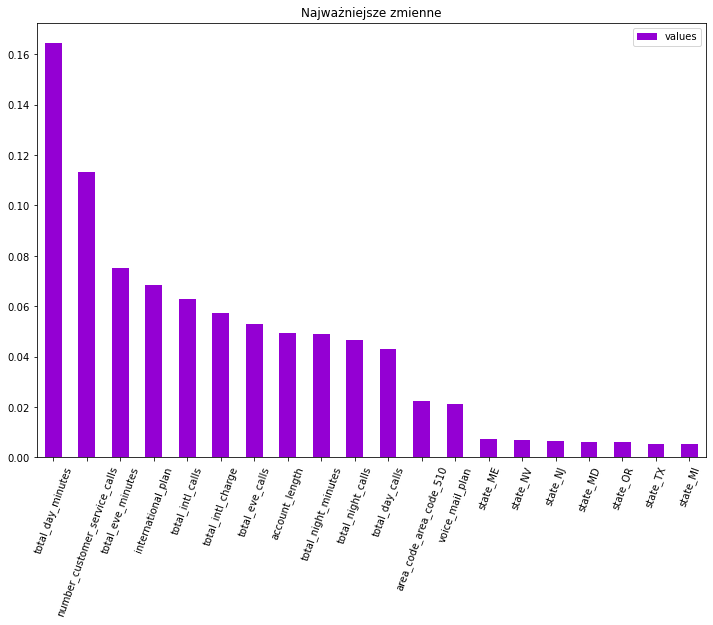

In [37]:
features_tree_.plot(kind='bar',color='darkviolet',figsize=(12,8))
plt.title('Najważniejsze zmienne')
plt.xticks(rotation=70)

In [38]:
important_features = features_tree_[0:12].index

###### Powyżej zostały wypisane najważniejsze zmienne według ExtraTreesClassifier

# 9. Budowa modelu

###### 9.1 Undersampling

In [39]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
X_resampled_pd = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled_pd = pd.DataFrame(y_resampled)

In [40]:
y_train.value_counts()

0    2556
1     419
Name: churn, dtype: int64

In [41]:
y_resampled.value_counts()

1    419
0    419
Name: churn, dtype: int64

In [42]:
def evaluateModel(alg, X_train, Y_train, X_test, Y_test, treshold):

    #Fit the algorithm on the data
    alg.fit(X_train, Y_train)
        
    #Predict test set:
    X_test_predictions = alg.predict(X_test)
    X_test_predprob0 = alg.predict_proba(X_test)
    X_test_predprob = alg.predict_proba(X_test)[:,1]
    
    for i in range(len(X_test_predprob)):
        if X_test_predprob[i] >= treshold:
            X_test_predprob[i] = 1
        else:
            X_test_predprob[i] = 0
    
    print("AUC Score: " + str(roc_auc_score(Y_test, X_test_predprob0[:,1])))
    print("Accuracy Test: " + str(accuracy_score(Y_test, X_test_predictions)))
    print("Precision: " + str(precision_score(Y_test, X_test_predprob)))
    print("Recall: " + str(recall_score(Y_test, X_test_predprob)))

    confMatrix=confusion_matrix(Y_test, X_test_predprob)
    
    confMatrix=pd.DataFrame(confMatrix)
    
    confMatrix.columns=[['Predicted 0','Predicted 1']]
    confMatrix.index=[['True 0','True 1']]
    print('')
    print('Confusion Matrix:')
    print('')

    print(confMatrix)
    
    print('Accuracy Matrix:')
    Accuracy_Matrix=100*confMatrix.div(confMatrix.sum(axis=1),axis=0)
    print(Accuracy_Matrix)
    print('')
    return  X_test_predprob0

###### Powyżej został stworzony drugi zbiór danych, który został poddany operacji undersamplingu.

### 9.2 Model regresji logistycznej

###### 9.21 Ewaluacja modelu przed undersamplingiem

In [43]:
X_test[important_features]

,total_day_minutes,number_customer_service_calls,total_eve_minutes,international_plan,total_intl_calls,total_intl_charge,total_eve_calls,account_length,total_night_minutes,total_night_calls,total_day_calls,area_code_area_code_510
3344,267.9,3,145.4,0,1,4.02,143,68,273.3,119,80,0
1801,154.5,1,216.2,0,3,3.70,91,81,229.8,82,84,1
1782,60.6,0,165.9,0,7,3.59,96,112,132.8,99,113,0
1714,154.5,2,193.6,0,3,3.62,87,119,180.9,145,129,1
911,101.9,0,223.1,0,2,3.48,97,105,241.6,77,79,1
...,...,...,...,...,...,...,...,...,...,...,...,...
94,126.7,1,206.0,0,7,3.59,90,125,247.8,114,108,0
950,78.5,1,210.5,0,4,3.19,101,83,179.7,102,109,0
1451,115.9,1,111.3,0,4,1.92,56,100,170.2,77,87,1
2607,135.4,0,237.1,0,4,4.73,122,82,118.3,91,102,0


In [44]:
log_reg = LogisticRegression(max_iter=200)
print('TRAIN set')
evaluateModel(log_reg, X_train[important_features], y_train, X_train[important_features], y_train, 0.5)
print('')
print('TEST set')
preds_lr = evaluateModel(log_reg, X_train[important_features], y_train, X_test[important_features], y_test, 0.5)

TRAIN set


D:\AnacondaReal\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC Score: 0.7791811862957111
Accuracy Test: 0.8584873949579832
Precision: 0.4925373134328358
Recall: 0.1575178997613365

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        2488          68
True 1         353          66
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   97.339593    2.660407
True 1   84.248210   15.751790


TEST set
AUC Score: 0.7891520205521346
Accuracy Test: 0.8619607843137255
Precision: 0.5263157894736842
Recall: 0.16759776536312848

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        1069          27
True 1         149          30
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   97.536496    2.463504
True 1   83.240223   16.759777



D:\AnacondaReal\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


###### 9.22 Ewaluacja modelu po undersamplingu

In [45]:
log_reg = LogisticRegression(max_iter=200)
print('TRAIN set')
evaluateModel(log_reg, X_resampled_pd[important_features], y_resampled_pd , X_resampled_pd[important_features], y_resampled_pd, 0.9)
print('')
print('TEST set')
preds_lr_samp = evaluateModel(log_reg, X_resampled_pd[important_features], y_resampled_pd, X_test[important_features], y_test, 0.9)

D:\AnacondaReal\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


TRAIN set


D:\AnacondaReal\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\AnacondaReal\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\AnacondaReal\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the d

AUC Score: 0.9050472485346974
Accuracy Test: 0.8353221957040573
Precision: 0.9897435897435898
Recall: 0.4606205250596659

Confusion Matrix:

       Predicted 0 Predicted 1
True 0         417           2
True 1         226         193
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   99.522673    0.477327
True 1   53.937947   46.062053


TEST set
AUC Score: 0.7491640500754394
Accuracy Test: 0.6039215686274509
Precision: 0.3132530120481928
Recall: 0.43575418994413406

Confusion Matrix:

       Predicted 0 Predicted 1
True 0         925         171
True 1         101          78
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   84.397810   15.602190
True 1   56.424581   43.575419



###### 9.23 Porownanie modelu regresji logistycznej przed undersamplingiem i po

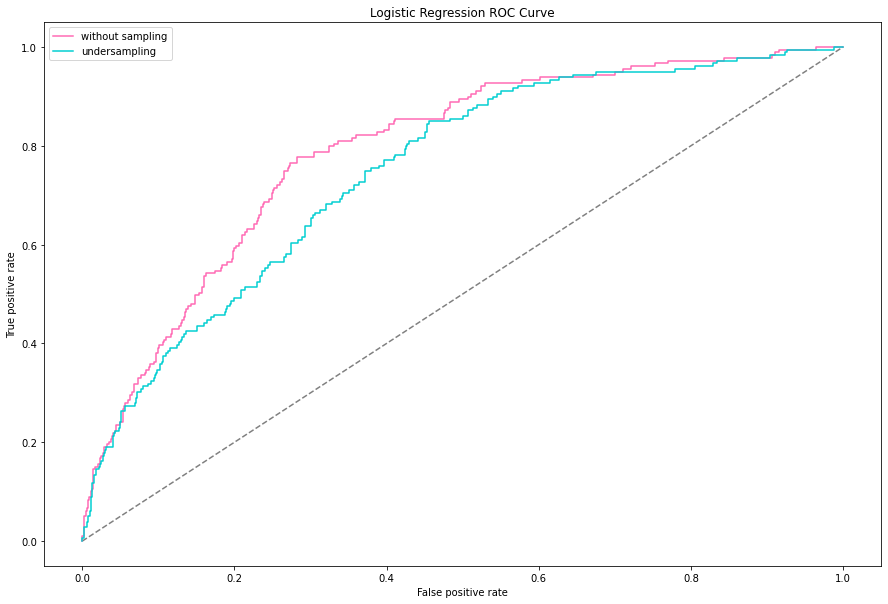

In [46]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, preds_lr[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_lr_samp[:,1])
plt.figure(figsize=(15,10))
plt.title("Logistic Regression ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(fpr1, tpr1, label='without sampling', color='hotpink')
plt.plot(fpr2, tpr2, label='undersampling', color='darkturquoise')
plt.legend(loc="upper left")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

###### Mimo, że krzywe ROC i AUC jest podobne, to jednak precyzja dla modelu bez undersamplingu dla różnych punktów odcięcia jest lepsza, niż dla modelu po undersamplingu (model z undersamplingiem dużo klasyfikuje jako FP), dlatego decyduje się na odrzucenie modelu z undersamplingiem.

###### 9.24 Optymalizacja modelu regresji logistycznej

In [48]:
model = LogisticRegression(max_iter=1000)
solvers = [ 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [49]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train[important_features], y_train)

In [50]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#Zoptymalizowane parametry regresji logistycznej

Best: 0.864317 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [51]:
log_reg = LogisticRegression(max_iter=1000,C=0.1,penalty='l2',solver='lbfgs')
print('TRAIN set')
evaluateModel(log_reg, X_train[important_features], y_train, X_train[important_features], y_train, 0.5)
print('')
print('TEST set')
preds_lr_opt = evaluateModel(log_reg, X_train[important_features], y_train, X_test[important_features], y_test, 0.5)

TRAIN set
AUC Score: 0.8175615613596723
Accuracy Test: 0.8611764705882353
Precision: 0.5272727272727272
Recall: 0.13842482100238662

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        2504          52
True 1         361          58
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   97.965571    2.034429
True 1   86.157518   13.842482


TEST set
AUC Score: 0.8215501773844962
Accuracy Test: 0.8611764705882353
Precision: 0.5208333333333334
Recall: 0.13966480446927373

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        1073          23
True 1         154          25
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0    97.90146     2.09854
True 1    86.03352    13.96648



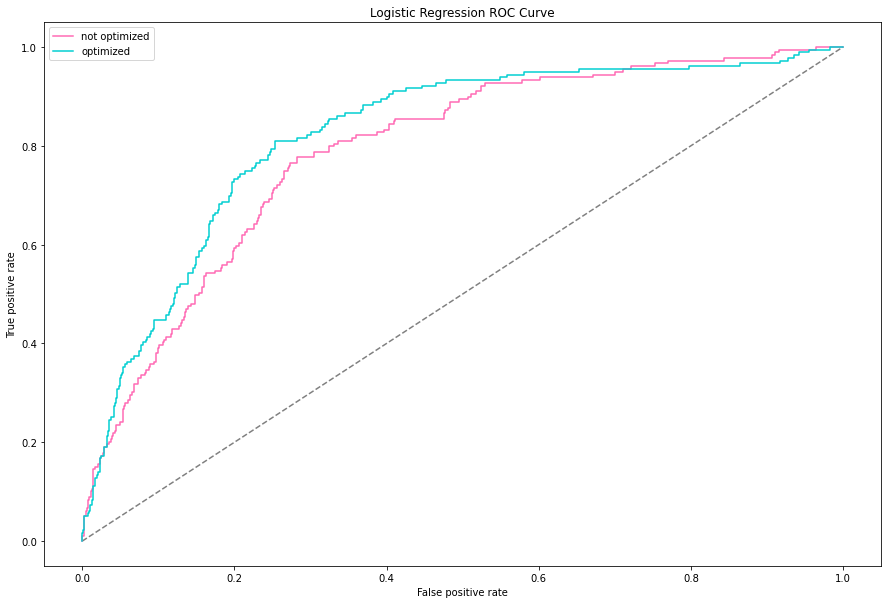

In [52]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, preds_lr[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_lr_opt[:,1])
plt.figure(figsize=(15,10))
plt.title("Logistic Regression ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(fpr1, tpr1, label='not optimized', color='hotpink')
plt.plot(fpr2, tpr2, label='optimized', color='darkturquoise')
plt.legend(loc="upper left")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

###### Po optymalizacji parametrów regresji logistycznej obszar pod krzywa ROC jest znacząco większy

### 9.3 Model random forest

In [54]:
rf = RandomForestClassifier()
print('TRAIN set')
evaluateModel(rf, X_train[important_features], y_train, X_train[important_features], y_train, 0.5)
print('TEST set')
preds_rf = evaluateModel(rf, X_train[important_features], y_train, X_test[important_features], y_test, 0.5)

TRAIN set
AUC Score: 1.0
Accuracy Test: 1.0
Precision: 1.0
Recall: 1.0

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        2556           0
True 1           0         419
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0       100.0         0.0
True 1         0.0       100.0

TEST set
AUC Score: 0.9202534355502997
Accuracy Test: 0.9372549019607843
Precision: 0.890625
Recall: 0.6368715083798883

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        1082          14
True 1          65         114
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   98.722628    1.277372
True 1   36.312849   63.687151



###### Na regresji logistycznej z undersamplingiem było gorzej, więc tutaj już nie sprawdzam dla danych undersamplingowych

In [56]:
param_grid1 = {
    'max_depth': np.arange(3,20,1),
    'max_features': ["auto", "sqrt", "log2"]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid1, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train[important_features],y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 3 folds for each of 51 candidates, totalling 153 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   20.6s finished


({'max_depth': 15, 'max_features': 'auto'}, 0.9307561738441673)

In [57]:
param_grid2 = {
    'min_samples_leaf': [3, 4, 5, 10],
    'min_samples_split': [3, 8, 10, 12]
}
rf = RandomForestClassifier(max_depth=19, max_features='log2')
grid_search2 = GridSearchCV(estimator = rf, 
 param_grid = param_grid2)
grid_search2.fit(X_train[important_features],y_train)
grid_search2.best_params_, grid_search2.best_score_

({'min_samples_leaf': 3, 'min_samples_split': 3}, 0.9270588235294118)

In [58]:
param_grid3= {
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier(max_depth=19, max_features='log2', min_samples_leaf=3, min_samples_split=8)
grid_search3 = GridSearchCV(estimator = rf, 
 param_grid = param_grid3, cv=5)
grid_search3.fit(X_train[important_features],y_train)
grid_search3.best_params_, grid_search3.best_score_

({'n_estimators': 100}, 0.9273949579831934)

In [59]:
rf = RandomForestClassifier(max_depth=19, max_features='log2', min_samples_leaf=3, min_samples_split=8,n_estimators=200)
print('TRAIN set')
evaluateModel(rf, X_train[important_features], y_train, X_train[important_features], y_train, 0.5)
print('TEST set')
preds_rf_opt = evaluateModel(rf, X_train[important_features], y_train, X_test[important_features], y_test, 0.5)

TRAIN set
AUC Score: 0.9959298351765324
Accuracy Test: 0.9757983193277311
Precision: 0.9887323943661972
Recall: 0.837708830548926

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        2552           4
True 1          68         351
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   99.843505    0.156495
True 1   16.229117   83.770883

TEST set
AUC Score: 0.9206000489336541
Accuracy Test: 0.9317647058823529
Precision: 0.8833333333333333
Recall: 0.5921787709497207

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        1082          14
True 1          73         106
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   98.722628    1.277372
True 1   40.782123   59.217877



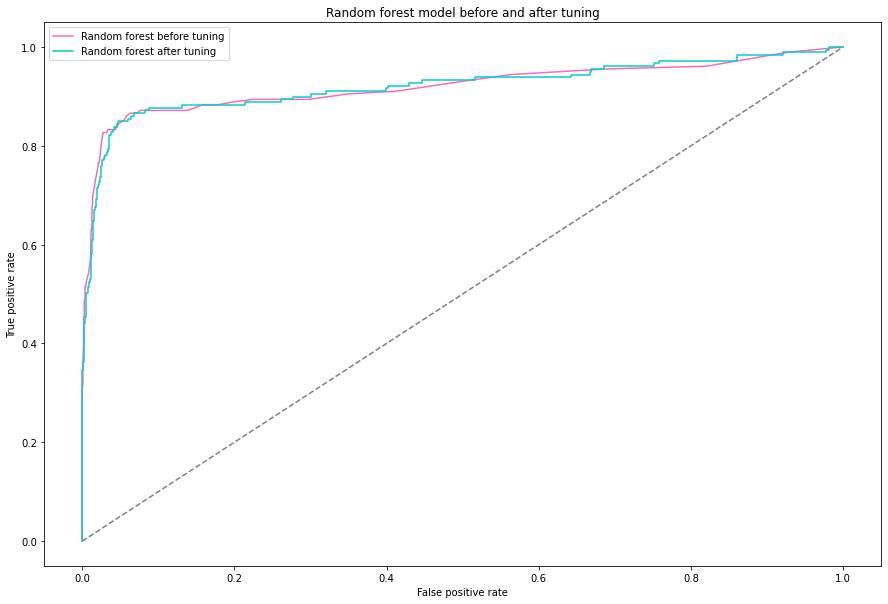

In [60]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, preds_rf[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_rf_opt[:,1])
plt.figure(figsize=(15,10))
plt.title("Random forest model before and after tuning")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(fpr1, tpr1, label='Random forest before tuning', color='hotpink')
plt.plot(fpr2, tpr2, label='Random forest after tuning', color='darkturquoise')
plt.legend(loc="upper left")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [61]:
#optymalizacja niezbyt wplynela, oba sa bardzo podobne

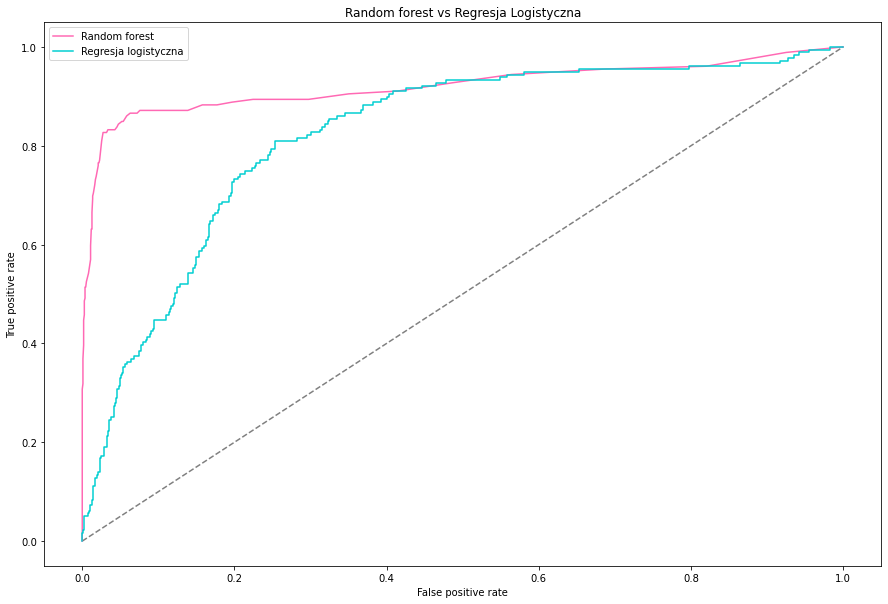

In [62]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, preds_rf[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_lr_opt[:,1])
plt.figure(figsize=(15,10))
plt.title("Random forest vs Regresja Logistyczna")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(fpr1, tpr1, label='Random forest', color='hotpink')
plt.plot(fpr2, tpr2, label='Regresja logistyczna', color='darkturquoise')
plt.legend(loc="upper left")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

###### Po powyższym wykresie widać, że las losowy jest zdecydowanie lepszy od modelu regresji logistycznej

### 9.4 Model XGBoost

In [64]:
xg_boost_1 = XGBClassifier(objective= 'binary:logistic')
print('TRAIN set')
evaluateModel(xg_boost_1, X_train[important_features], y_train, X_train[important_features], y_train, 0.5)
print('TEST set')
preds_xgb = evaluateModel(xg_boost_1, X_train[important_features], y_train, X_test[important_features], y_test, 0.3)

TRAIN set
AUC Score: 1.0
Accuracy Test: 1.0
Precision: 1.0
Recall: 1.0

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        2556           0
True 1           0         419
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0       100.0         0.0
True 1         0.0       100.0

TEST set
AUC Score: 0.9176079598744037
Accuracy Test: 0.9411764705882353
Precision: 0.8571428571428571
Recall: 0.7374301675977654

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        1074          22
True 1          47         132
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   97.992701    2.007299
True 1   26.256983   73.743017



In [65]:
param_test1 = {
 'max_depth': np.arange(3,20,1),
 'min_child_weight': np.arange(1,6,1),
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(objective= 'binary:logistic'), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train[important_features],y_train)
gsearch1.best_params_, gsearch1.best_score_

D:\AnacondaReal\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 10, 'min_child_weight': 1}, 0.9004990674011394)

In [66]:
param_test2 = {
 'gamma': [i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( max_depth=3,
 min_child_weight=2,
 objective= 'binary:logistic'), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train[important_features],y_train)
gsearch2.best_params_, gsearch2.best_score_

D:\AnacondaReal\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'gamma': 0.3}, 0.8987507940800101)

In [67]:
param_test3= {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( max_depth=3,
 min_child_weight=2, gamma=0,
 objective= 'binary:logistic'), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train[important_features],y_train)
gsearch3.best_params_, gsearch3.best_score_

D:\AnacondaReal\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'colsample_bytree': 0.6, 'subsample': 0.8}, 0.9002710989856826)

In [68]:
param_test4= {
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( max_depth=3,
 min_child_weight=2, gamma=0, colsample_bytree = 0.6, subsample= 0.9,
 objective= 'binary:logistic'), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train[important_features],y_train)
gsearch4.best_params_, gsearch4.best_score_

D:\AnacondaReal\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'reg_alpha': 1e-05}, 0.8999752772096213)

In [69]:
xg_boost_1 = XGBClassifier(max_depth=3,
 min_child_weight=2, gamma=0, colsample_bytree = 0.6, subsample= 0.9,
 objective= 'binary:logistic',reg_alpha=1)
print('TRAIN set')
evaluateModel(xg_boost_1, X_train[important_features], y_train, X_train[important_features], y_train, 0.5)
print('TEST set')
preds_xgb_opt = evaluateModel(xg_boost_1, X_train[important_features], y_train, X_test[important_features], y_test, 0.3)

TRAIN set
AUC Score: 0.9876130290093784
Accuracy Test: 0.9704201680672269
Precision: 0.9635854341736695
Recall: 0.8210023866348448

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        2543          13
True 1          75         344
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   99.491393    0.508607
True 1   17.899761   82.100239

TEST set
AUC Score: 0.921328956489826
Accuracy Test: 0.9341176470588235
Precision: 0.7942857142857143
Recall: 0.776536312849162

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        1060          36
True 1          40         139
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   96.715328    3.284672
True 1   22.346369   77.653631



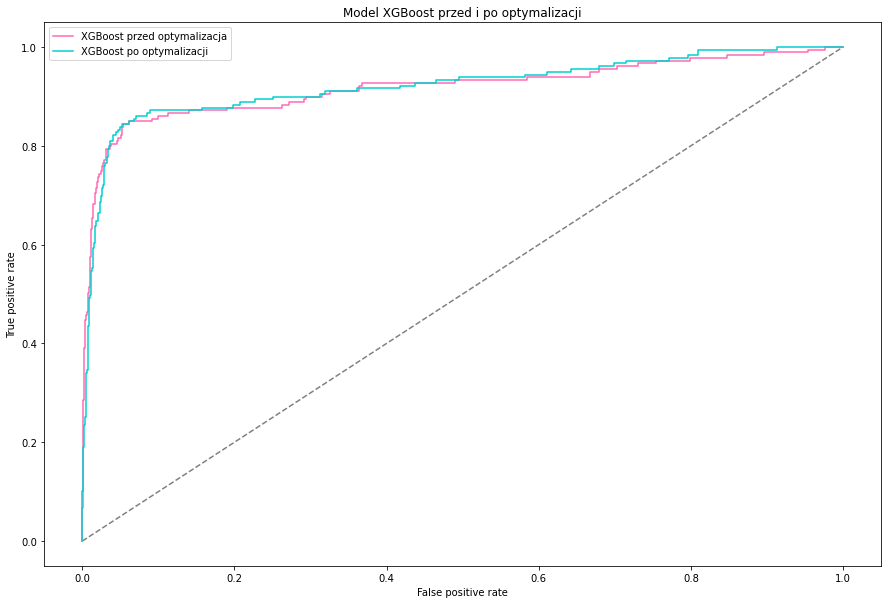

In [70]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, preds_xgb[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_xgb_opt[:,1])
plt.figure(figsize=(15,10))
plt.title("Model XGBoost przed i po optymalizacji")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(fpr1, tpr1, label='XGBoost przed optymalizacja', color='hotpink')
plt.plot(fpr2, tpr2, label='XGBoost po optymalizacji', color='darkturquoise')
plt.legend(loc="upper left")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

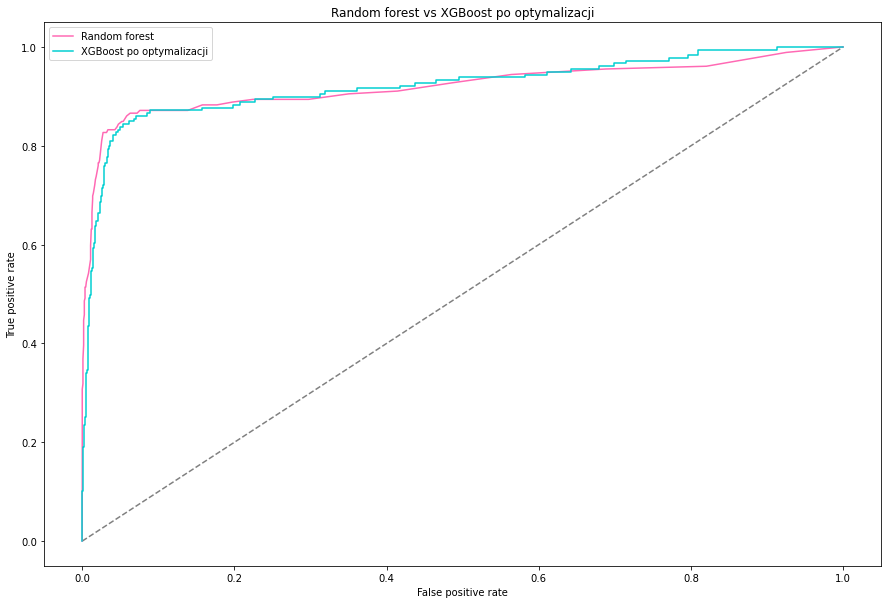

In [71]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, preds_rf[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_xgb_opt[:,1])
plt.figure(figsize=(15,10))
plt.title("Random forest vs XGBoost po optymalizacji")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(fpr1, tpr1, label='Random forest', color='hotpink')
plt.plot(fpr2, tpr2, label='XGBoost po optymalizacji', color='darkturquoise')
plt.legend(loc="upper left")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

###### AUC jest takie samo w modelu XGBoost i Random Forest, recall lepszy w XGBoost ale w Random Forest lepsza jest precyzja. Modele są bardzo podobne i błędem nie będzie wzięcie jednego bądź drugiego.

###### Gdyby to były rzeczywiste dane, to tak idealny wynik powinien budzić podejrzenia. Raczej nie jest on możliwy do uzyskania na rzeczywistych danych, jeżeli nie dołączymy przypadkiem niepożądanej zmiennej

###### Podsumowując, w naszym zbiorze danych nie było braków danych. Na początku została przeprowadzona analiza opisowa danych,która pozwoliła na wyciągnięcie podstawowych wniosków dotyczących zbioru danych. Później ze zbioru zostały wykluczone pewne zmienne, które nie wpływały istotnie na zmienną celu. Na końcu została przeprowadzona analiza pod kątem wyboru odpowiedniego modelu  predykcyjnego. Najlepszym modelem okazał się Random Forest lub XGBoost.